# Import Data



In [18]:
import google.colab as gc
gc.drive.mount('/content/drive')
%cd '/content/drive/My Drive/Class-20210420-01/ChandraLesmana/Data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1Atr52kQtpKI__DG99japz14wr8jXJe6S/Class-20210420-01/ChandraLesmana/Data


In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('heart.csv')

In [21]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0



* Age    : Age of the patient
*   Sex  : Sex of the patient
*   cp : Chest Pain type chest pain type
  *  Value 1: typical angina
  *  Value 2: atypical angina
  *  Value 3: non-anginal pain
  *  Value 4: asymptomatic
*   trtbps : resting blood pressure (in mm Hg)
*   chol : cholestoral in mg/dl fetched via BMI sensor
*   fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
*   restecg : resting electrocardiographic results
   *  Value 0: normal
   *  Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
   *  Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
*   thalach : maximum heart rate achieved
*   exng : exercise induced angina (1 = yes; 0 = no)

*   oldpeak : Previous Peak
*   slp : Slope
*   caa : Number of major vessels (0-3)
*   thall : Thal rate (0-3)
*   output : 0= less chance of heart attack 1= more chance of heart attack



# Data Analyse



In [22]:
import seaborn as sns

In [23]:
x1 = df[['age','sex','output']].groupby(['age','sex']).sum()
x1 = x1.reset_index()

In [24]:
col = x1['output']
max_val = col.max()
max_index = col.idxmax()

In [25]:
x1['age'][max_index]

52

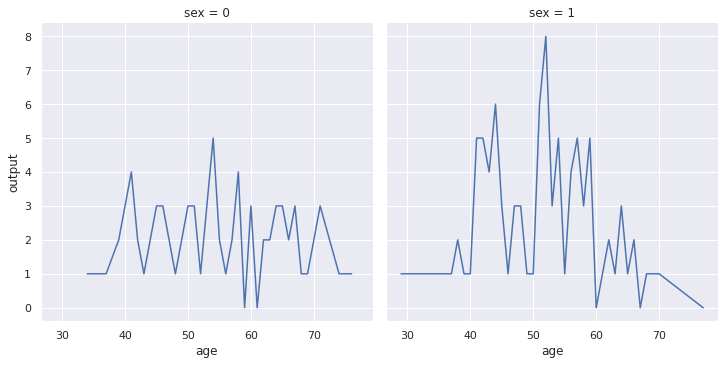

In [26]:
sns.relplot(
    data=x1, kind="line",
    x="age", y="output", col="sex",
    
)

In [27]:
a = df[['sex','chol','trtbps','fbs','age']].groupby(['age','sex','fbs']).mean()
a.head(20)

chol      trtbps
age sex fbs                        
29  1   0    204.000000  130.000000
34  0   0    210.000000  118.000000
    1   0    182.000000  118.000000
35  0   0    183.000000  138.000000
    1   0    224.000000  122.666667
37  0   0    215.000000  120.000000
    1   0    250.000000  130.000000
38  1   0    193.666667  132.000000
39  0   0    209.500000  116.000000
    1   0    270.000000  129.000000
40  1   0    196.333333  134.000000
41  0   0    244.000000  118.250000
    1   0    205.166667  119.500000
42  0   0    237.000000  111.000000
    1   0    252.000000  134.800000
        1    240.000000  120.000000
43  0   0    213.000000  122.000000
        1    341.000000  132.000000
    1   0    250.600000  125.000000
        1    247.000000  132.000000

In [28]:
a.reset_index()

,age,sex,fbs,chol,trtbps
0,29,1,0,204.0,130.000000
1,34,0,0,210.0,118.000000
2,34,1,0,182.0,118.000000
3,35,0,0,183.0,138.000000
4,35,1,0,224.0,122.666667
...,...,...,...,...,...
96,71,0,0,225.5,136.000000
97,71,0,1,265.0,110.000000
98,74,0,0,269.0,120.000000
99,76,0,0,197.0,140.000000


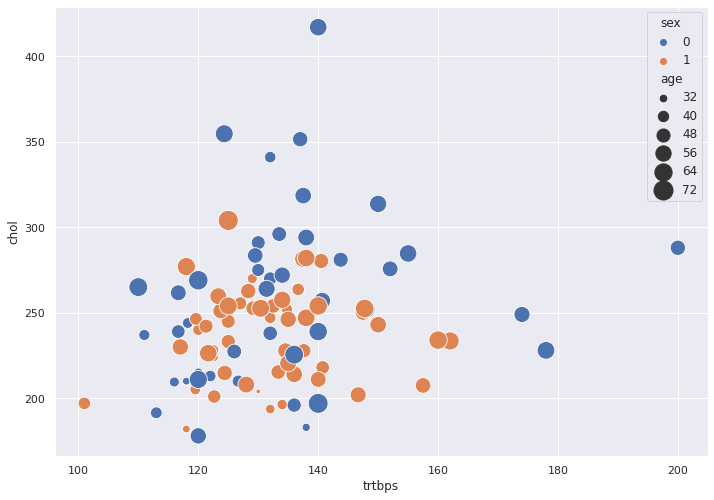

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=a, x='trtbps', y="chol", hue='sex', size='age',sizes=(20, 400))

In [30]:
b = df[['output','chol','trtbps','age']].groupby(['age','output']).mean()
b.head(20)

chol      trtbps
age output                        
29  1       204.000000  130.000000
34  1       196.000000  118.000000
35  0       240.000000  123.000000
    1       187.500000  130.000000
37  1       232.500000  125.000000
38  0       231.000000  120.000000
    1       175.000000  138.000000
39  0       219.000000  118.000000
    1       246.666667  124.000000
40  0       195.000000  131.000000
    1       199.000000  140.000000
41  0       172.000000  110.000000
    1       226.111111  120.000000
42  0       315.000000  136.000000
    1       237.000000  125.714286
43  0       255.000000  128.000000
    1       257.800000  125.400000
44  0       218.666667  114.000000
    1       222.375000  123.250000
45  0       286.500000  126.000000

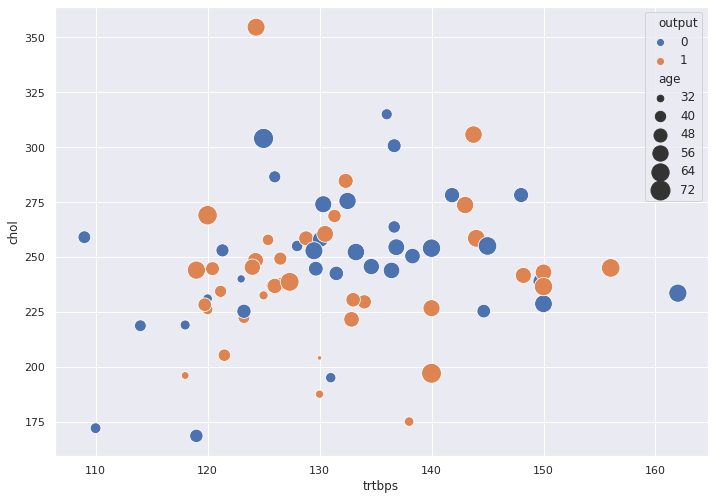

In [31]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=b, x='trtbps', y="chol", hue='output', size='age',sizes=(20, 400))

In [32]:
len(df)

303

In [39]:
print('{:.0%}'.format(len(df[df['output'] == 1])/len(df)))

54%


In [40]:
print('{:.0%}'.format(len(df[df['output'] == 0])/len(df)))

46%


# Data Understanding


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

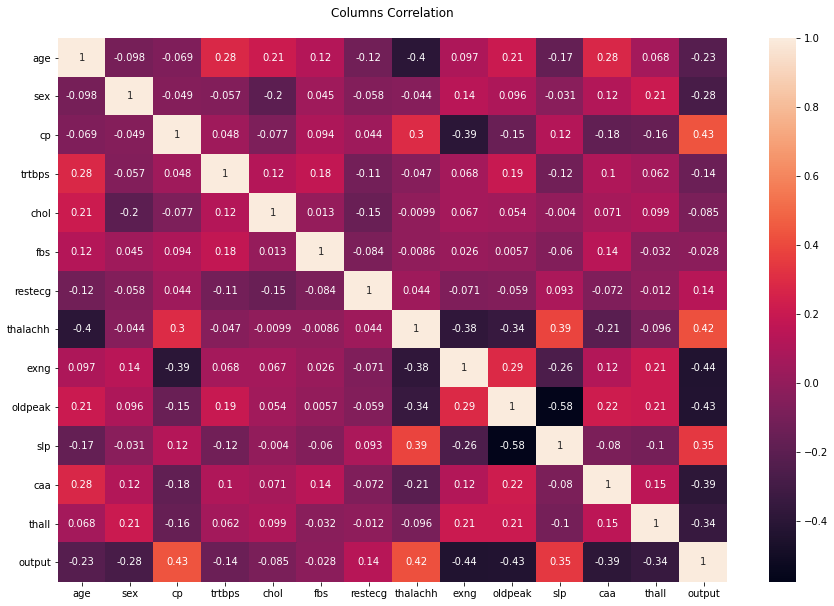

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Columns Correlation\n")
sns.heatmap(df.corr(), annot=True)

In [ ]:
for feat in df.columns:
    hh = df.groupby(feat)['output'].count()
    print(feat,',', 'Unique :',len(df[feat].unique()))

age , Unique : 41
sex , Unique : 2
cp , Unique : 4
trtbps , Unique : 49
chol , Unique : 152
fbs , Unique : 2
restecg , Unique : 3
thalachh , Unique : 91
exng , Unique : 2
oldpeak , Unique : 40
slp , Unique : 3
caa , Unique : 5
thall , Unique : 4
output , Unique : 2


# Data Preparation

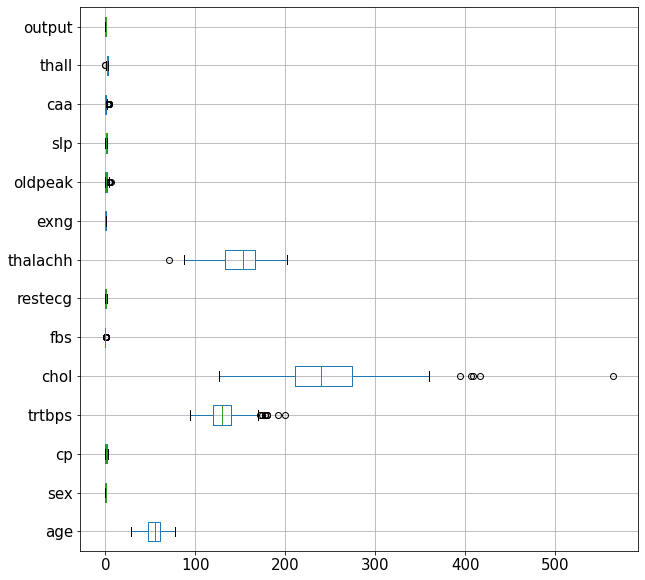

In [ ]:
df.boxplot(vert=False, fontsize=15,figsize=(10,10))

In [ ]:
data = df.copy()

In [ ]:
from scipy.stats import zscore
import numpy as np

z_scores = zscore(data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2.196).all(axis=1)
new_df = df[filtered_entries]

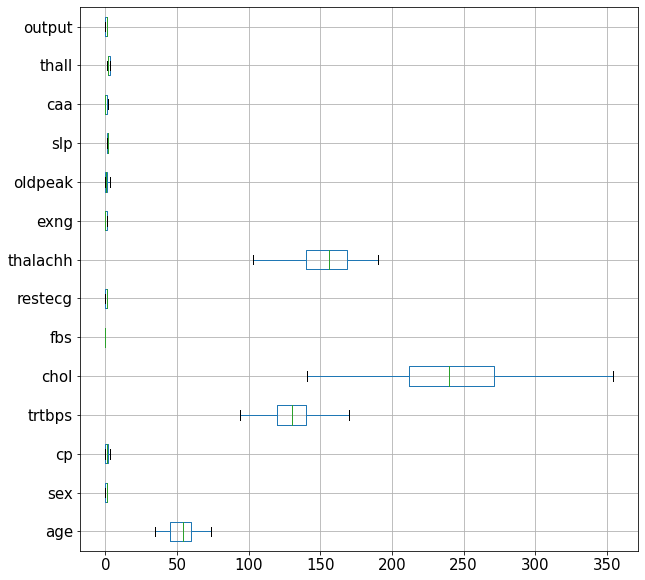

In [ ]:
new_df.boxplot(vert=False, fontsize=15,figsize=(10,10))

In [ ]:
column_numerical = ['age','trtbps','chol','thalachh','oldpeak']
column_categorical = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
column_target = ['output']

In [ ]:
final_feature_column = column_numerical+column_categorical
column_final = final_feature_column+column_target
final_df = new_df.copy()

In [ ]:
final_df.shape

(201, 14)

In [ ]:
final_df['output'].value_counts()

1    122
0     79
Name: output, dtype: int64

# Model Selection

In [ ]:
final_feature_array = final_df[final_feature_column].to_numpy()
target_array = final_df[column_target].to_numpy()

In [ ]:
import sklearn.model_selection as model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    final_feature_array,
    target_array,
    train_size=0.67,
    random_state=0
    )

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import sklearn.metrics as metrics

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
pipe_MLP = Pipeline([('scaler',MinMaxScaler()),
                        ('pca1',PCA()),
                        ('Multilayer Perceptron',MLPClassifier())])

pipe_knn = Pipeline([('scaler',MinMaxScaler()),
                     ('pca1',PCA()),
                    ('K-Neighbors Classifier',KNeighborsClassifier())])

pipe_Svm = Pipeline([('scaler',MinMaxScaler()),
                     ('pca1',PCA()),
                    ('SVM Classification',SVC())])

pipe_RForest = Pipeline([('scaler',MinMaxScaler()),
                    ('pca1',PCA()),     
                   ('Random Forest Classifier',RandomForestClassifier())])


pipe_GNB = Pipeline([('scaler',MinMaxScaler()),
                     ('pca1',PCA()),
                  ('Gaussian Naive Bayes',GaussianNB())])

pipe_SGD = Pipeline([('scaler',MinMaxScaler()),
                     ('pca1',PCA()),
                  ('Stochastic Gradient Descent',SGDClassifier())])



In [ ]:
pipelines = [pipe_MLP ,pipe_knn,pipe_Svm,pipe_RForest,pipe_GNB,pipe_SGD]

In [ ]:
for pipe in pipelines:
    pipe.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

In [ ]:
model_name =[]
scores=[]

for i,model in enumerate(pipelines):
    pred = model.predict(X_test)
    score = metrics.accuracy_score(y_test,pred)
    model_name.append(model.steps[2][0])
    scores.append(score)
    print(model.steps[2][0].upper(),score)
    print('\n')

MULTILAYER PERCEPTRON 0.8955223880597015


K-NEIGHBORS CLASSIFIER 0.8656716417910447


SVM CLASSIFICATION 0.8507462686567164


RANDOM FOREST CLASSIFIER 0.7611940298507462


GAUSSIAN NAIVE BAYES 0.8656716417910447


STOCHASTIC GRADIENT DESCENT 0.6865671641791045




In [ ]:
def classification_prediction(model):
  model.fit(X_train, y_train)
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  target_array_pred = model.predict(final_feature_array)
  print('Real Data')
  print(y_train[:5])
  print('\n Predicted Data')
  print(y_train_pred[:5])
  final_with_pred_df = final_df.copy()
  final_with_pred_df['label_predicted'] = target_array_pred.reshape(-1,)
  #final_with_pred_df.head(5)
  
  # evaluate classification model - accuracy
  accuracy_training = metrics.accuracy_score(y_train,y_train_pred)
  accuracy_test = metrics.accuracy_score(y_test,y_test_pred)

  print('Accuracy Training Data: {}'.format(accuracy_training))
  print('Accuracy Test Data: {}'.format(accuracy_test))
  return final_with_pred_df

In [ ]:
result = classification_prediction(pipe_MLP)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Real Data
[[0]
 [1]
 [1]
 [0]
 [1]]

 Predicted Data
[0 1 1 1 1]
Accuracy Training Data: 0.9104477611940298
Accuracy Test Data: 0.8955223880597015


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
result

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,label_predicted
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0,1
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0


# Visualization

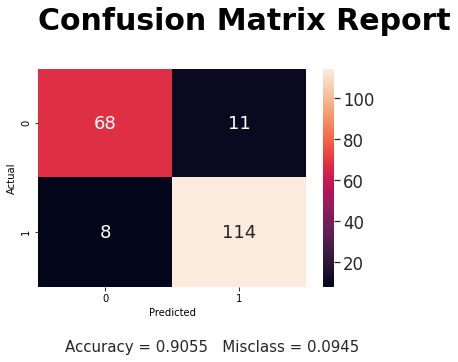

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

conf = confusion_matrix(result['output'], result['label_predicted'])

confusion_matrix = pd.crosstab(result['output'], result['label_predicted'], rownames=['Actual'], colnames=['Predicted'])
plt.title('Confusion Matrix Report\n', fontsize=30,fontweight="bold", loc='left')
sns.set(font_scale=1.5)
sns.heatmap(confusion_matrix, annot=True, fmt="d")
accuracy = np.trace(conf) / float(np.sum(conf))
misclass = 1 - accuracy
plt.text(0.2,2.6,'Accuracy = {:0.4f}   Misclass = {:0.4f}'.format(accuracy, misclass), fontsize=15)


plt.show()